# CW - Solutions

# Q1(a) 
Read in the csv file "Olympic_Games.csv" to create a dataframe. Remove the columns named 'ID','Name','Team','Games' and 'City'. Further, remove all the rows which have 'NA' in the 'Medal' column. In the 'Sex' column, convert all of the 'M's to 0 and all of the 'F's to 1. In the 'Season' column, convert all of the 'Summer's to 0 and all of the 'Winter's to 1. In the 'Medal' column, convert all of the 'Gold's to 3, all of the 'Silver's to 2, all of the 'Bronze's to 1. In the 'NOC' column, convert all of the 'FRG's to 'GER' and convert all of the 'GDR's to 'GER'. Finally remove all the rows which have "NOC" equals "URS" or "RUS". (4 marks)

In [1]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read the file
Games = pd.read_csv("Olympic_Games.csv")

In [3]:
Games

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [4]:
#remove the columns
Rmv_Col = Games.drop(columns=['ID','Name','Team','Games','City'])

In [5]:
#Drop the NA values
S = Rmv_Col.dropna(subset='Medal',axis=0) 

In [6]:
#Rename Dataframe
dd=pd.DataFrame(S)

In [7]:
#Convert all the values
dd.loc[dd['Sex'] == 'M', 'Sex'] = 0
dd.loc[dd['Sex'] == 'F', 'Sex'] = 1
dd.loc[dd['Season'] == 'Summer', 'Season'] = 0
dd.loc[dd['Season'] == 'Winter', 'Season'] = 1
dd.loc[dd['Medal'] == 'Gold', 'Medal'] = 3
dd.loc[dd['Medal'] == 'Silver', 'Medal'] = 2
dd.loc[dd['Medal'] == 'Bronze', 'Medal'] = 1
dd.loc[dd['NOC'] == 'FRG', 'NOC'] = 'GER'
dd.loc[dd['NOC'] == 'GDR', 'NOC'] = 'GER'

In [8]:
#remove all the rows which have "NOC" equals "URS" or "RUS"
ch = dd[~dd['NOC'].isin(['URS', 'RUS'])]

In [9]:
ch

,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Event,Medal
3,0,34.0,NaN,NaN,DEN,1900,0,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,3
37,0,30.0,NaN,NaN,FIN,1920,0,Swimming,Swimming Men's 200 metres Breaststroke,1
38,0,30.0,NaN,NaN,FIN,1920,0,Swimming,Swimming Men's 400 metres Breaststroke,1
40,0,28.0,184.0,85.0,FIN,2014,1,Ice Hockey,Ice Hockey Men's Ice Hockey,1
41,0,28.0,175.0,64.0,FIN,1948,0,Gymnastics,Gymnastics Men's Individual All-Around,1
...,...,...,...,...,...,...,...,...,...,...
271032,1,22.0,181.0,78.0,NED,1996,0,Judo,Judo Women's Middleweight,1
271046,0,21.0,175.0,70.0,POL,1980,0,Athletics,Athletics Men's 4 x 100 metres Relay,2
271048,0,27.0,197.0,93.0,NED,1992,0,Rowing,Rowing Men's Double Sculls,1
271049,0,31.0,197.0,93.0,NED,1996,0,Rowing,Rowing Men's Coxed Eights,3


# Q1(b)
Remove all 'NOC' which appear less than 25 times. 
(i) Create a histrogram of the number of countries with medals using 10 bins. 
(ii) Create a histrogram of the number of countries with gold medals using 10 bins. 
(iii) Create a histrogram of the number of countries with points using 10 bins, where points equals the sum of the number of bronze medals plus twice the number of silver medals but three times the number of gold medals. Comment on these results. (6 marks)

In [10]:
#Remove all 'NOC' which appear less than 25 times.
noc_count = ch['NOC'].value_counts()
noc_to_remove = noc_count[noc_count < 25].index.tolist()
ss = ch[~ch['NOC'].isin(noc_to_remove)]
ss

,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Event,Medal
3,0,34.0,NaN,NaN,DEN,1900,0,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,3
37,0,30.0,NaN,NaN,FIN,1920,0,Swimming,Swimming Men's 200 metres Breaststroke,1
38,0,30.0,NaN,NaN,FIN,1920,0,Swimming,Swimming Men's 400 metres Breaststroke,1
40,0,28.0,184.0,85.0,FIN,2014,1,Ice Hockey,Ice Hockey Men's Ice Hockey,1
41,0,28.0,175.0,64.0,FIN,1948,0,Gymnastics,Gymnastics Men's Individual All-Around,1
...,...,...,...,...,...,...,...,...,...,...
271032,1,22.0,181.0,78.0,NED,1996,0,Judo,Judo Women's Middleweight,1
271046,0,21.0,175.0,70.0,POL,1980,0,Athletics,Athletics Men's 4 x 100 metres Relay,2
271048,0,27.0,197.0,93.0,NED,1992,0,Rowing,Rowing Men's Double Sculls,1
271049,0,31.0,197.0,93.0,NED,1996,0,Rowing,Rowing Men's Coxed Eights,3


<AxesSubplot:ylabel='Frequency'>

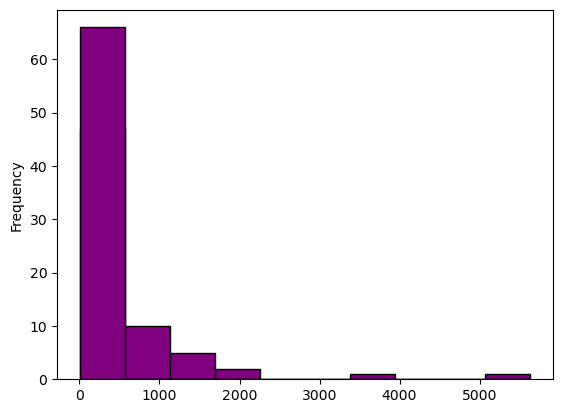

In [11]:
#Create a histrogram of the number of countries with medals using 10 bins.
country_counts = ss['NOC'].value_counts().reset_index()
num_medals = country_counts['NOC'].value_counts().reset_index()
num_medals.plot(kind='hist', color='purple',ec='Black',legend=False,bins=10)

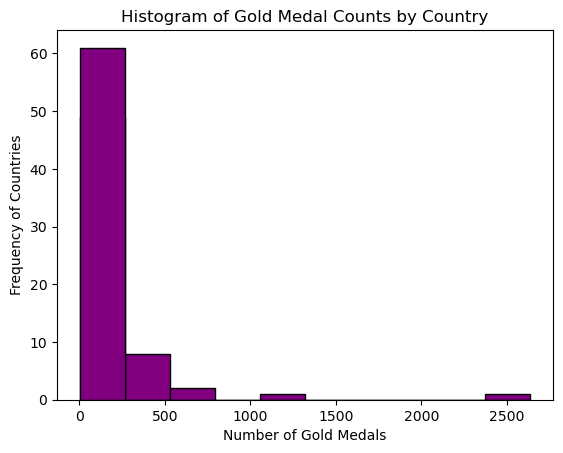

In [12]:
# Filter the DataFrame to only include gold medals
gold_df = ss[ss['Medal'] == 3]
coun= gold_df['NOC'].value_counts().reset_index()
num_medals = coun['NOC'].value_counts().reset_index()
num_medals.plot(kind='hist', color='purple',ec='Black',legend=False,bins=10)
# Set the labels and title
plt.xlabel('Number of Gold Medals')
plt.ylabel('Frequency of Countries')
plt.title('Histogram of Gold Medal Counts by Country')

# Show the plot
plt.show()

Text(0.5, 1.0, 'frequency of countries against number of points')

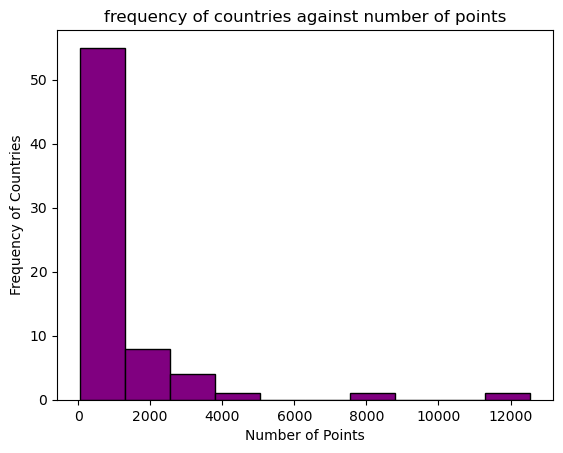

In [13]:
#Create a histrogram of the number of countries with points using 10 bins
coun=ss.groupby('NOC')['Medal'].sum() 
coun=coun.reset_index()
coun
coun['Medal'].plot(kind='hist',color='purple',ec='Black',bins=10)
# Set the labels and title
plt.xlabel('Number of Points')
plt.ylabel('Frequency of Countries')
plt.title('frequency of countries against number of points')

# Q1(c)
(i) Create a bar chart of the number of medals for each sex. 
(ii) Create a bar chart of the number of medals for each season. 
(iii) Create a histogram of the frequency of the age of the athletes. 
(iv) Create a histogram of the frequency of the height of the athletes. 
(v) Create a histogram of the frequency of the weight of the athletes. 
Comment on these results. (6 marks)

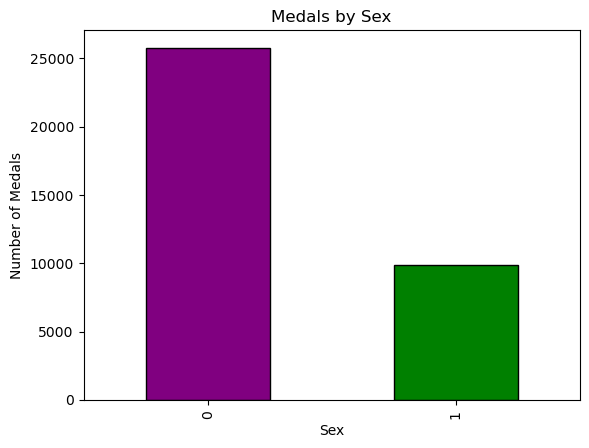

In [14]:
#Create a bar chart of the number of medals for each sex
medals_by_sex = ss.groupby('Sex')['Medal'].count()
medals_by_sex.plot(kind='bar', color=['purple','green'], ec='Black')
# Set the labels and title
plt.xlabel('Sex')
plt.ylabel('Number of Medals')
plt.title('Medals by Sex')
plt.show()

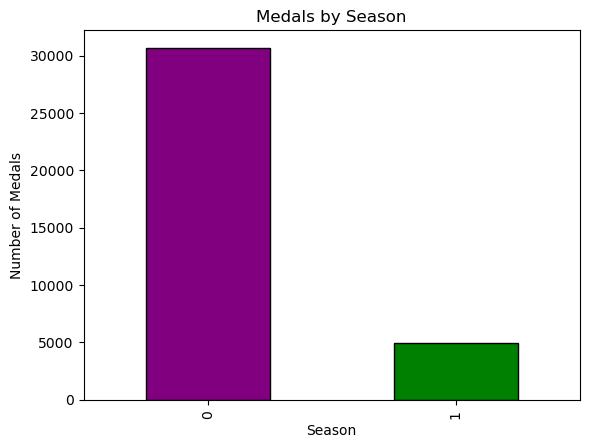

In [15]:
#Create a bar chart of the number of medals for each season.
medals_by_sex = ss.groupby('Season')['Medal'].count()
medals_by_sex.plot(kind='bar', color=['purple','green'], ec='Black')
plt.xlabel('Season')
plt.ylabel('Number of Medals')
plt.title('Medals by Season')
plt.show()

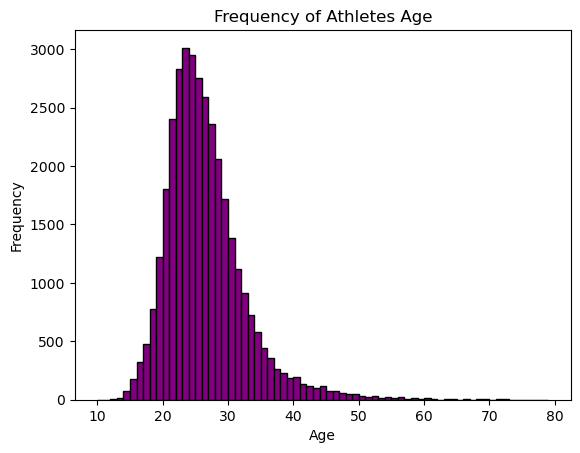

In [16]:
#Create a histogram of the frequency of the athletes age.
ss['Age'].plot(kind='hist', color='purple',bins=range(10,80),ec='Black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency of Athletes Age')
plt.show()

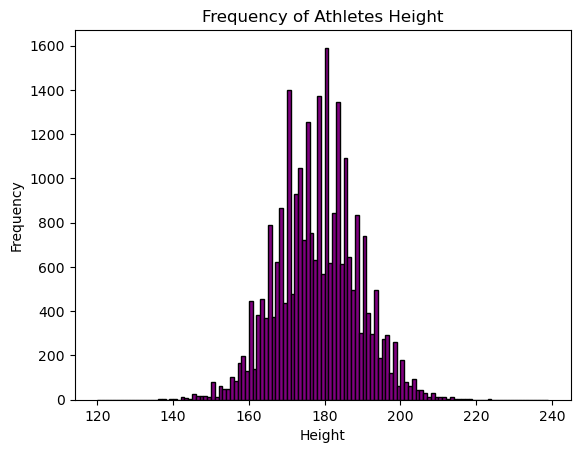

In [17]:
#Create a histogram of the frequency of the athletes height.
ss['Height'].plot(kind='hist', color='purple',bins=range(120,240), ec='Black')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Frequency of Athletes Height')
plt.show()

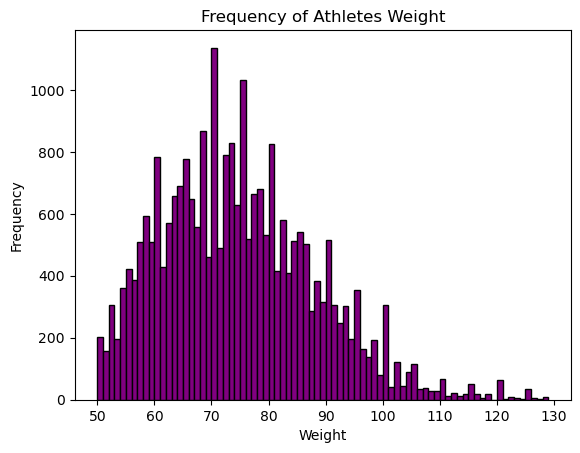

In [18]:
#Create a histogram of the frequency of the athletes Weight.
ss['Weight'].plot(kind='hist', color='purple',bins=range(50,130),ec='Black')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Frequency of Athletes Weight')
plt.show()

# Q1(d)
Remove all the rows which have 'NaN' in the 'Height' or 'Weight' columns. Make a scatter plot of "Weight" and "Height" and colour the points using "Sex". Create a new column called "BMI" equal to the "Weight" divided by the ("Height"/100)^2. Make a scatter plot of "BMI" and "Weight" and colour the points using "Sex". Create a correlation matrix and discuss your results. (6 marks)

In [19]:
pf=ss.dropna(subset=['Height','Weight'])

<function matplotlib.pyplot.show(close=None, block=None)>

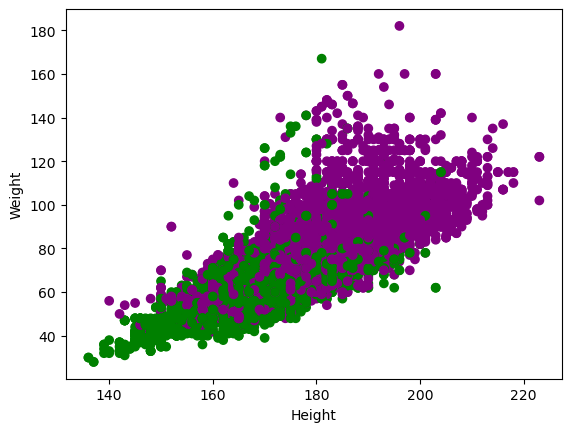

In [20]:
plt.scatter(pf['Height'],pf['Weight'],c=pf['Sex'].map({0:'purple',1:'green'}))
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show

In [21]:
#Crating a new column 'BMI'
pf['BMI']=pf['Weight']/(pf['Height']/100)**2


<function matplotlib.pyplot.show(close=None, block=None)>

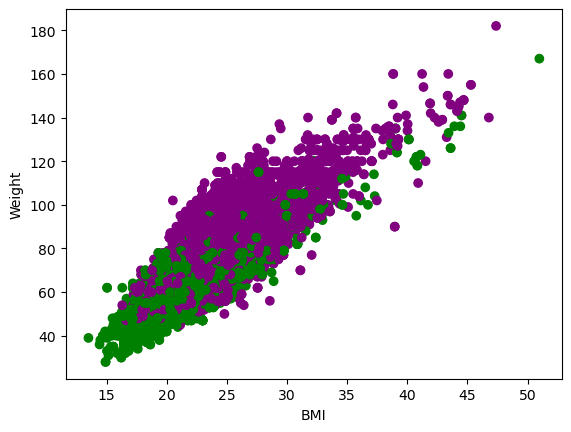

In [22]:
#Creating the Scatter plot
plt.scatter(pf['BMI'],pf['Weight'],c=pf['Sex'].map({0:'purple',1:'green'}))
plt.xlabel('BMI')
plt.ylabel('Weight')
plt.show

In [23]:
#Creating the correlation matrix
corr_matrix=pf.corr()
print(corr_matrix)

             Age    Height    Weight      Year       BMI
Age     1.000000  0.096922  0.158269  0.112662  0.170008
Height  0.096922  1.000000  0.803173  0.025421  0.330621
Weight  0.158269  0.803173  1.000000  0.015696  0.821515
Year    0.112662  0.025421  0.015696  1.000000 -0.011399
BMI     0.170008  0.330621  0.821515 -0.011399  1.000000


In [24]:
#changing the Dataframe
cf=pd.DataFrame(pf)

In [25]:
cf

,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Event,Medal,BMI
40,0,28.0,184.0,85.0,FIN,2014,1,Ice Hockey,Ice Hockey Men's Ice Hockey,1,25.106333
41,0,28.0,175.0,64.0,FIN,1948,0,Gymnastics,Gymnastics Men's Individual All-Around,1,20.897959
42,0,28.0,175.0,64.0,FIN,1948,0,Gymnastics,Gymnastics Men's Team All-Around,3,20.897959
44,0,28.0,175.0,64.0,FIN,1948,0,Gymnastics,Gymnastics Men's Horse Vault,3,20.897959
48,0,28.0,175.0,64.0,FIN,1948,0,Gymnastics,Gymnastics Men's Pommelled Horse,3,20.897959
...,...,...,...,...,...,...,...,...,...,...,...
271032,1,22.0,181.0,78.0,NED,1996,0,Judo,Judo Women's Middleweight,1,23.808797
271046,0,21.0,175.0,70.0,POL,1980,0,Athletics,Athletics Men's 4 x 100 metres Relay,2,22.857143
271048,0,27.0,197.0,93.0,NED,1992,0,Rowing,Rowing Men's Double Sculls,1,23.963514
271049,0,31.0,197.0,93.0,NED,1996,0,Rowing,Rowing Men's Coxed Eights,3,23.963514


# Comments

   This code will generate a correlation matrix for each variable in the dataset. It is critical to remember that correlation does not indicate causality when reading the correlation matrix. A correlation value of 1 shows a perfect positive connection, a correlation coefficient of -1 indicates a perfect negative correlation, and a correlation coefficient of 0 indicates no association. The greater the connection, the closer the correlation coefficient is to 1 or -1. A positive correlation between BMI and Weight in the context of the BMI and Weight scatter plot would suggest that as weight increases, so does BMI. The correlation coefficient, however, should be taken in light of other characteristics, such as gender and age, which may alter the association between BMI and weight.

# Q1(e)
When "Sex" equals 0, remove all rows with "Age" greater than 43, or "Age" less than 18, or "Height" less than 158, or "Height" greater than 205, or "Weight" less than 52 or "Weight" greater than 120. When "Sex" equals 1, remove all rows with "Age" greater than 39, or "Age" less than 15, or "Height" less than 148, or "Height" greater than 193, or "Weight" less than 40 or "Weight" greater than 94. Remove rows with "Year"'s less than 1948 and remove "Season"'s equal to 1. Remove the "Season" column. Now remove "Sports" which have less than 200 medals. Now make a bar chart of the number of medals in each "Sport". Comment on this. Now remove the "Events" column. Name your dataframe "dfe". (6 marks)

In [26]:
# Remove rows based on the conditions
cf = cf.loc[(cf['Sex'] == 0) & (cf['Age'].between(18, 43)) & (cf['Height'].between(158, 205)) & (cf['Weight'].between(52, 120)) |
            (cf['Sex'] == 1) & (cf['Age'].between(15, 39)) & (cf['Height'].between(148, 193)) & (cf['Weight'].between(40, 94))]













In [27]:
# Remove rows based on "Year" and "Season"
cf = cf.loc[(cf['Year'] >= 1948) & (cf['Season'] != 1)]

In [28]:
# Remove the "Season" column
cf.drop(columns=['Season'],inplace=True)

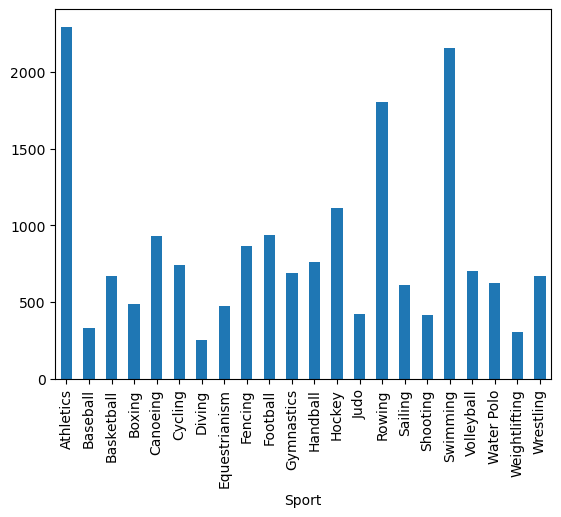

In [29]:
# Remove sports with less than 200 medals
cf = cf.groupby('Sport').filter(lambda x: len(x) >= 200)

# Create a bar chart of the number of medals in each "Sport"
import matplotlib.pyplot as plt
cf.groupby('Sport')['Medal'].count().plot(kind='bar')
plt.show()

# Remove the "Events" column and rename the dataframe
dfe = cf.drop(columns=['Event']).copy()

In [30]:
dfe

,Sex,Age,Height,Weight,NOC,Year,Sport,Medal,BMI
41,0,28.0,175.0,64.0,FIN,1948,Gymnastics,1,20.897959
42,0,28.0,175.0,64.0,FIN,1948,Gymnastics,3,20.897959
44,0,28.0,175.0,64.0,FIN,1948,Gymnastics,3,20.897959
48,0,28.0,175.0,64.0,FIN,1948,Gymnastics,3,20.897959
50,0,32.0,175.0,64.0,FIN,1952,Gymnastics,1,20.897959
...,...,...,...,...,...,...,...,...,...
271032,1,22.0,181.0,78.0,NED,1996,Judo,1,23.808797
271046,0,21.0,175.0,70.0,POL,1980,Athletics,2,22.857143
271048,0,27.0,197.0,93.0,NED,1992,Rowing,1,23.963514
271049,0,31.0,197.0,93.0,NED,1996,Rowing,3,23.963514


In [31]:
print(dfe.dtypes)

Sex        object
Age       float64
Height    float64
Weight    float64
NOC        object
Year        int64
Sport      object
Medal      object
BMI       float64
dtype: object


In [32]:
# convert a particular column to float
dfe['Medal'] = dfe['Medal'].astype(float)

In [33]:
# convert a particular column to float
dfe['Sex'] = dfe['Sex'].astype(float)

# Comments

Comments:  
      The following bar graph displays the total number of medals earned in each sport with at least 200 medals. In terms of the number of medals won, we can observe that "Athletics" and "Swimming" are the most popular sports, followed by "Rowing". It is worth noting that certain sports, such as "Diving","Weightlifting" and "Baseball," have less medals than others but still have a substantial amount of medals. Overall, the bar chart depicts the distribution of medals across different sports and emphasises the most popular Olympic sports.

# Q1(f)
Normalise the "Age", "Height", "Weight", "Year", "Medal" and "BMI" columns. In this part of the question just consider the case when the "Sport" equals "Baseball". You should split the data into (80%) training data and (20%) test data. Use an appropriate linear model from sklearn to predict "NOC" using the normalised values "Sex", "Age", "Height", "Weight", "Year", "Medal" and "BMI". Test your model using the test data set. Discuss your results. (6 marks) 

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

# Filter the dataframe to include only Baseball sport
dfe_Baseball = dfe[dfe['Sport'] == 'Baseball']

# Normalize the required columns
scaler = StandardScaler()
dfe_Baseball[['Age', 'Height', 'Weight', 'Year', 'Medal', 'BMI']] = scaler.fit_transform(dfe_Baseball[['Age', 'Height', 'Weight', 'Year', 'Medal', 'BMI']])

# Split the data into training and testing sets
label = LabelEncoder()
X = dfe_Baseball[['Sex', 'Age', 'Height', 'Weight', 'Year', 'Medal', 'BMI']]
y = label.fit_transform(dfe_Baseball['NOC'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use a linear model to predict NOC based on Sex, Age, Height, Weight, Year, Medal, and BMI
model = LogisticRegression()
model.fit(X_train, y_train)

# Test the model on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance using accuracy
print(accuracy_score(y_test,y_pred)*100.0)

59.70149253731343


# Comments
  The accuracy_score function may be used to output the logistic regression model's accuracy on the test set. The result will be a proportion of the model's correct predictions. A higher accuracy score suggests that the model is doing better.Therefore, the printed accuracy score will give us an idea of how well the logistic regression model is performing on the given data.

# Q1(g)
You are now going to try to predict "NOC" when the "Sport" column is "Baseball". Now split the data into (80%) training data and (20%) test data. Create any regression model you like using PyTorch; select an appropriate criterion, optimisation algorithm, and learning rate. Train the model and report the training error. Comment on the testing error. (6 marks)

In [35]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [36]:
import torch
from torch import nn, optim
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [37]:
# Filter the dataframe to include only Baseball sport
dfe_Baseball = dfe[dfe['Sport'] == 'Baseball']

In [38]:
# Normalize the required columns
scaler = StandardScaler()
dfe_Baseball[['Age', 'Height', 'Weight', 'Year', 'Medal', 'BMI']] = scaler.fit_transform(dfe_Baseball[['Age', 'Height', 'Weight', 'Year', 'Medal', 'BMI']])


In [39]:
# Split the data into training and testing sets
label = LabelEncoder()
X = dfe_Baseball[['Sex', 'Age', 'Height', 'Weight', 'Year', 'Medal', 'BMI']].values
y = label.fit_transform(dfe_Baseball['NOC'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
# Convert numpy arrays to PyTorch tensors
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train).unsqueeze(1)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test).unsqueeze(1)

In [41]:
# Define the model
class RegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.fc = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        x = self.fc(x)
        return x

model = RegressionModel(X_train.shape[1], y_train.shape[1])

In [42]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [43]:
# Train the model
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the training error every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Training Loss: {loss.item():.4f}')

Epoch 1/1000, Training Loss: 7.5944
Epoch 101/1000, Training Loss: 3.7060
Epoch 201/1000, Training Loss: 2.6069
Epoch 301/1000, Training Loss: 2.3379
Epoch 401/1000, Training Loss: 2.2953
Epoch 501/1000, Training Loss: 2.2910
Epoch 601/1000, Training Loss: 2.2906
Epoch 701/1000, Training Loss: 2.2905
Epoch 801/1000, Training Loss: 2.2905
Epoch 901/1000, Training Loss: 2.2904


In [44]:
# Test the model on the testing set
y_pred_test = model(X_test)
test_loss = criterion(y_pred_test, y_test)
print(f'Testing Loss: {test_loss.item():.4f}')

Testing Loss: 2.1725


Comments 
   
   After each epoch, the training error is reported, and it should decrease over time as the model learns to suit the input. The testing error indicates how effectively the model generalises to new, previously unknown data. A greater testing error than training error may suggest overfitting, which occurs when the model learns to match the training data too well and does not generalise effectively to new data. We now have The training error is less than the testing error. 

# Q1(h)

 Using your dataset obtained in Q1(e), create a new dataframe called ‘new df’. Create a list called ‘Rownames’ using the 69 ‘NOC’ values which you will use as the row names. Create a list called ‘Columnames’ using the 22 ‘Sport’ values which you will use as the column names. The values in ‘new df’ should represent the total number of points (i.e. the total of the ‘Medal’ number) each ‘NOC’ gets in each ‘Sport’. Obtain the correlation matrix of ‘new df’. Discuss your results. Write ‘new df’ to a csv file and read this into R. In R, create 4 different plots to illustrate some statistical properties of ‘new df’. Discuss any
significant results.

In [45]:
#Changing the dataframe
new_df=pd.DataFrame(dfe)

In [46]:
new_df = dfe.pivot_table(index='NOC', columns='Sport', values='Medal', aggfunc='sum',fill_value=0)
Rownames = list(new_df.index)
Columnames = list(new_df.columns)

In [47]:
#creating Correlation matrix
corr_matrix = new_df.corr()
corr_matrix

Sport,Athletics,Baseball,Basketball,Boxing,Canoeing,Cycling,Diving,Equestrianism,Fencing,Football,...,Hockey,Judo,Rowing,Sailing,Shooting,Swimming,Volleyball,Water Polo,Weightlifting,Wrestling
Sport,,,,,,,,,,,,,,,,,,,,,
Athletics,1.000000,0.306160,0.861224,0.647716,0.298932,0.462955,0.575473,0.705025,0.193167,0.555895,...,0.190745,0.175007,0.634178,0.664448,0.636551,0.927243,0.455930,0.406145,0.237538,0.507289
Baseball,0.306160,1.000000,0.323489,0.716334,-0.044456,0.026725,0.155502,0.101371,-0.011181,0.085594,...,0.014799,0.450991,0.064768,0.141164,0.166363,0.324647,0.419753,0.106254,0.057504,0.356711
Basketball,0.861224,0.323489,1.000000,0.554457,0.009352,0.194316,0.572689,0.422709,0.080004,0.455326,...,0.024906,0.088453,0.332043,0.586793,0.533123,0.923494,0.499469,0.536284,0.228290,0.511071
Boxing,0.647716,0.716334,0.554457,1.000000,0.258637,0.366009,0.392500,0.485976,0.341329,0.408233,...,0.074323,0.339860,0.457667,0.372963,0.546793,0.576954,0.482764,0.337429,0.312305,0.475617
Canoeing,0.298932,-0.044456,0.009352,0.258637,1.000000,0.590409,0.135560,0.654414,0.595000,0.578363,...,0.427038,0.220459,0.711184,0.307191,0.460108,0.233183,0.033600,0.331422,0.186316,0.268373
Cycling,0.462955,0.026725,0.194316,0.366009,0.590409,1.000000,0.276179,0.894378,0.540054,0.390332,...,0.631741,0.350424,0.805753,0.682839,0.558802,0.417225,0.160827,0.221318,0.069232,0.099041
Diving,0.575473,0.155502,0.572689,0.392500,0.135560,0.276179,1.000000,0.390493,0.164330,0.334440,...,0.121100,0.160607,0.386117,0.407771,0.820749,0.625288,0.491690,0.265306,0.714006,0.312939
Equestrianism,0.705025,0.101371,0.422709,0.485976,0.654414,0.894378,0.390493,1.000000,0.426420,0.574817,...,0.592366,0.327402,0.910944,0.685484,0.636495,0.638704,0.266444,0.244008,0.135977,0.285044
Fencing,0.193167,-0.011181,0.080004,0.341329,0.595000,0.540054,0.164330,0.426420,1.000000,0.366670,...,0.090730,0.377595,0.354127,0.154740,0.519419,0.145319,0.175510,0.518885,0.199056,0.201352


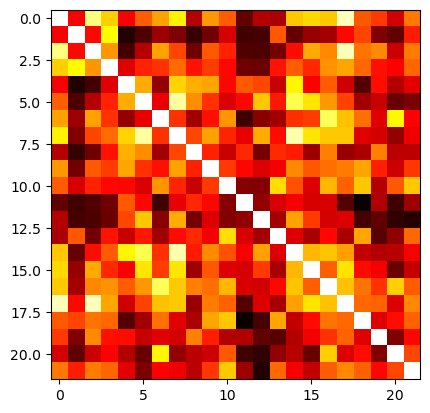

In [48]:
#plotting the corr_matrix
plt.imshow(corr_matrix,cmap='hot',interpolation='nearest')
plt.show()

In [49]:
new_df

Sport,Athletics,Baseball,Basketball,Boxing,Canoeing,Cycling,Diving,Equestrianism,Fencing,Football,...,Hockey,Judo,Rowing,Sailing,Shooting,Swimming,Volleyball,Water Polo,Weightlifting,Wrestling
NOC,,,,,,,,,,,,,,,,,,,,,
ARG,7,0,36,3,0,6,0,2,0,135,...,148,4,3,19,0,1,12,0,0,0
AUS,131,48,80,4,62,146,25,60,0,0,...,352,2,207,104,20,634,0,65,3,0
AUT,10,0,0,0,7,0,0,9,0,0,...,0,11,10,27,12,5,0,0,0,0
AZE,0,0,0,9,3,0,0,0,0,0,...,0,8,0,0,3,0,0,0,0,38
BAH,71,0,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UKR,25,0,0,23,20,10,4,0,26,0,...,0,4,24,20,18,17,0,0,11,27
URU,0,0,8,1,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
USA,1459,113,717,122,30,85,139,153,48,224,...,16,22,432,174,111,2131,214,220,39,150


In [50]:
#Converting file to CSV
new_df.to_csv('new_df.csv')

Comments 

This plot will depict the distribution of points gained by each NOC in each sport, with each sport displayed in its own aspect.Overall, the correlation matrix and plot findings will be determined by the specific data and sports included in the research. We may use these visualisations to discover any trends or linkages in the data, such as sports with high or low correlations with each other, or NOCs that thrive in particular sports but not others.

# Q2(a)
Read in the csv file "Gross_Domestic_Product.csv" to create the dataframe "gdp_df". Create a column named "NOC" which takes the values of "Code". Now remove the columns named "Entity" and "Code". In the 'NOC' column, change all 'DEU's to 'GER' and remove all the rows which have "NOC" equals "RUS". Now make sure that your dataframes "gdp_df" and "dfe" have the same values of "NOC" and "Year" and remove rows with different values of "NOC" or different values of "Year". Remove the columns 'Sex', 'Sport', 'Age', 'Height', 'Weight' and 'BMI' from "dfe". (6 marks)

In [51]:
gdp_df=pd.read_csv("Gross_Domestic_Product.csv")

In [52]:
gdp_df

,Entity,Code,Year,GDP
0,Afghanistan,AFG,2002,7.228792e+09
1,Afghanistan,AFG,2003,7.867259e+09
2,Afghanistan,AFG,2004,7.978511e+09
3,Afghanistan,AFG,2005,8.874476e+09
4,Afghanistan,AFG,2006,9.349917e+09
...,...,...,...,...
10452,Zimbabwe,ZWE,2016,2.011402e+10
10453,Zimbabwe,ZWE,2017,2.106128e+10
10454,Zimbabwe,ZWE,2018,2.207733e+10
10455,Zimbabwe,ZWE,2019,2.072084e+10


In [53]:
gdp_df['NOC']=gdp_df['Code']

In [54]:
#Dropping the columns
gdp_df=gdp_df.drop(columns=['Entity','Code'])

In [55]:
#pop.loc[pop['NOC'] == 'DEU', 'NOC'] = 'GER'
gdp_df['NOC'].replace('DEU', 'GER', inplace=True)

In [56]:
#remove all the rows which have "NOC" equals "RUS".
gdp_df=gdp_df[gdp_df['NOC']!='RUS']


In [57]:
# Make sure that 'gdp_df' and 'dfe' have the same values of 'NOC' and 'Year'
dfe = dfe[(dfe['NOC'].isin(gdp_df['NOC'])) & (dfe['Year'].isin(gdp_df['Year']))]
gdp_df = gdp_df[(gdp_df['NOC'].isin(dfe['NOC'])) & (gdp_df['Year'].isin(dfe['Year']))]

In [58]:
dfe

,Sex,Age,Height,Weight,NOC,Year,Sport,Medal,BMI
105,1.0,23.0,182.0,64.0,NOR,1996,Football,1.0,19.321338
158,0.0,21.0,198.0,90.0,ITA,2016,Rowing,1.0,22.956841
159,0.0,30.0,194.0,87.0,ESP,2008,Fencing,1.0,23.116165
172,0.0,28.0,180.0,83.0,BLR,2008,Canoeing,3.0,25.617284
173,0.0,23.0,182.0,86.0,FRA,2008,Handball,3.0,25.963048
...,...,...,...,...,...,...,...,...,...
270981,0.0,23.0,182.0,90.0,GEO,2004,Judo,3.0,27.170632
271009,1.0,28.0,167.0,60.0,GER,2004,Hockey,3.0,21.513859
271019,0.0,29.0,175.0,64.0,GER,2016,Hockey,1.0,20.897959
271046,0.0,21.0,175.0,70.0,POL,1980,Athletics,2.0,22.857143


In [59]:
gdp_df

,Year,GDP,NOC
276,1960,1.510000e+11,ARG
280,1964,1.640000e+11,ARG
284,1968,1.950000e+11,ARG
288,1972,2.370000e+11,ARG
292,1976,2.520000e+11,ARG
...,...,...,...
10145,2000,3.147265e+10,UZB
10149,2004,3.817499e+10,UZB
10153,2008,5.236266e+10,UZB
10157,2012,7.010685e+10,UZB


In [60]:
#Droppig the columns
dfe.drop(columns=['Sex','Sport','Age','Height','Weight','BMI'],inplace=True)

In [61]:
dfe

,NOC,Year,Medal
105,NOR,1996,1.0
158,ITA,2016,1.0
159,ESP,2008,1.0
172,BLR,2008,3.0
173,FRA,2008,3.0
...,...,...,...
270981,GEO,2004,3.0
271009,GER,2004,3.0
271019,GER,2016,1.0
271046,POL,1980,2.0


# Q2(b)
Read in the csv file "Demographic_Indicators.csv" to create the dataframe "dmg_df". Rename the columns "ISO3_code" as "NOC", "Time" as "Year" and "TPopulation1July" as "Population". In the 'NOC' column, change all 'DEU's to 'GER' and remove all the rows which have "NOC" equals "RUS". Now make sure that your dataframes "dmg_df" and "dfe" have the same values of "NOC" and "Year" and remove rows with different values of "NOC" or different values of "Year". Combine "dfe", "gdp_df" and "dmg_df" into a single dataframe called "com_df". Remove any rows with missing values. Don't forget to reset the index. (7 marks)

In [62]:
dmg_df=pd.read_csv("Demographic_Indicators.csv")

In [63]:
dmg_df

,SortOrder,ISO3_code,Location,Time,TPopulation1Jan,TPopulation1July,TPopulationMale1July,TPopulationFemale1July,PopDensity,PopSexRatio,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
0,1,NaN,World,1950,2477674.732,2499322.157,1245362.964,1253959.192,19.1661,99.3145,...,580.7496,498.0396,240.3164,271.6253,208.1916,378.6968,430.2594,324.9308,0.00,0.000
1,1,NaN,World,1951,2520969.582,2543130.380,1267473.182,1275657.198,19.5020,99.3584,...,566.7283,490.1993,231.1772,258.0905,203.7797,368.3186,415.8362,319.3364,0.00,0.000
2,1,NaN,World,1952,2565291.179,2590270.898,1291399.982,1298870.917,19.8635,99.4248,...,546.3173,477.2639,218.6745,240.0344,197.1422,353.0546,395.5327,309.9103,0.00,0.000
3,1,NaN,World,1953,2615250.618,2640278.797,1316659.222,1323619.574,20.2470,99.4741,...,535.8289,469.5325,212.8720,232.6019,193.0492,345.0826,385.8433,303.9053,0.00,0.000
4,1,NaN,World,1954,2665306.975,2691979.339,1342923.171,1349056.168,20.6435,99.5454,...,523.1236,458.4842,205.7622,224.0498,187.4439,335.4420,374.6576,295.9944,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43467,290,WLF,Wallis and Futuna Islands,2097,10.063,10.036,4.994,5.042,71.6857,99.0480,...,23.1199,28.0450,7.5105,6.3613,8.6783,21.0197,20.2116,21.8411,-0.01,-0.995
43468,290,WLF,Wallis and Futuna Islands,2098,10.009,9.989,4.971,5.018,71.3500,99.0634,...,22.7966,27.4133,7.3642,6.2703,8.4752,20.6236,19.9248,21.3338,-0.01,-1.000
43469,290,WLF,Wallis and Futuna Islands,2099,9.969,9.940,4.947,4.992,71.0000,99.0986,...,22.4732,26.9919,7.2513,6.1793,8.3398,20.3113,19.6379,20.9955,-0.01,-1.005
43470,290,WLF,Wallis and Futuna Islands,2100,9.911,9.887,4.922,4.965,70.6250,99.1240,...,22.1497,26.6620,7.1535,6.0883,8.2346,20.0363,19.3509,20.7325,-0.01,-1.011


In [64]:
#Rename the columns
dmg_df = dmg_df.rename(columns={'ISO3_code': 'NOC', 'Time': 'Year', 'TPopulation1July': 'Population'})

In [65]:
#In the 'NOC' column, change all 'DEU's to 'GER'
dmg_df['NOC'].replace('DEU', 'GER', inplace=True)

In [66]:
#remove all the rows which have "NOC" equals "RUS".
dmg_df=dmg_df[dmg_df['NOC']!='RUS']

In [67]:
# Make sure that 'gdp_df' and 'dfe' have the same values of 'NOC' and 'Year'
dfe = dfe[(dfe['NOC'].isin(dmg_df['NOC'])) & (dfe['Year'].isin(dmg_df['Year']))]
dmg_df = dmg_df[(dmg_df['NOC'].isin(dfe['NOC'])) & (dmg_df['Year'].isin(dfe['Year']))]

In [68]:
dfe

,NOC,Year,Medal
105,NOR,1996,1.0
158,ITA,2016,1.0
159,ESP,2008,1.0
172,BLR,2008,3.0
173,FRA,2008,3.0
...,...,...,...
270981,GEO,2004,3.0
271009,GER,2004,3.0
271019,GER,2016,1.0
271046,POL,1980,2.0


In [69]:
dmg_df

,SortOrder,NOC,Location,Year,TPopulation1Jan,Population,TPopulationMale1July,TPopulationFemale1July,PopDensity,PopSexRatio,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
4266,33,ETH,Ethiopia,1960,21476.715,21739.710,10771.242,10968.468,21.7397,98.2019,...,661.5705,584.8050,299.1512,327.2324,270.1749,434.5690,475.6081,391.9841,1.698,0.078
4270,33,ETH,Ethiopia,1964,23754.287,24073.696,11927.690,12146.006,24.0737,98.2026,...,638.9675,558.0422,286.6173,316.0235,256.4305,419.3332,462.0942,374.8705,10.745,0.446
4274,33,ETH,Ethiopia,1968,26409.808,26778.653,13271.850,13506.804,26.7787,98.2605,...,630.8221,554.0253,285.1459,312.4993,257.3013,417.4996,457.8608,375.9665,9.992,0.373
4278,33,ETH,Ethiopia,1972,29495.974,29891.328,14821.612,15069.716,29.8913,98.3536,...,647.5961,573.5006,294.8814,322.9490,266.3951,431.1068,472.0023,389.1795,-3.379,-0.113
4282,33,ETH,Ethiopia,1976,32630.289,33062.216,16393.050,16669.166,33.0622,98.3435,...,653.4090,563.6254,302.2794,340.1880,263.3680,436.5614,486.7961,384.2964,-36.153,-1.093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39722,266,NZL,New Zealand,2000,3843.356,3855.266,1892.614,1962.652,14.5535,96.4315,...,113.7750,74.9784,39.5214,51.7338,27.5436,85.6649,104.3004,67.0746,-6.080,-1.576
39726,266,NZL,New Zealand,2004,4054.696,4081.408,2000.841,2080.568,15.4072,96.1680,...,100.8973,70.0544,36.9036,46.6374,27.4171,77.9816,93.1336,63.0169,24.480,6.016
39730,266,NZL,New Zealand,2008,4240.473,4260.239,2083.936,2176.302,16.0823,95.7559,...,95.5151,64.1264,33.9391,43.6679,24.5633,72.8382,87.7490,58.3014,4.679,1.099
39734,266,NZL,New Zealand,2012,4395.630,4410.284,2156.372,2253.913,16.6487,95.6723,...,88.4809,58.5083,32.3354,40.5164,24.4755,67.2621,82.0020,53.0226,-1.539,-0.349


In [70]:
# combine DataFrames
com_df1 = pd.merge(dfe, gdp_df, on=['NOC', 'Year'])
com_df = pd.merge(com_df1, dmg_df, on=['NOC', 'Year'])
# remove rows with missing values
com_df = com_df.dropna()
# reset index
com_df = com_df.reset_index(drop=True)

In [71]:
com_df

,NOC,Year,Medal,GDP,SortOrder,Location,TPopulation1Jan,Population,TPopulationMale1July,TPopulationFemale1July,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
0,NOR,1996,1.0,2.660000e+11,172,Norway,4370.136,4381.510,2166.567,2214.943,...,113.5521,68.7246,36.7890,47.4570,25.4993,85.7187,106.7067,63.7288,5.756,1.315
1,NOR,1996,1.0,2.660000e+11,172,Norway,4370.136,4381.510,2166.567,2214.943,...,113.5521,68.7246,36.7890,47.4570,25.4993,85.7187,106.7067,63.7288,5.756,1.315
2,NOR,1996,1.0,2.660000e+11,172,Norway,4370.136,4381.510,2166.567,2214.943,...,113.5521,68.7246,36.7890,47.4570,25.4993,85.7187,106.7067,63.7288,5.756,1.315
3,NOR,1996,1.0,2.660000e+11,172,Norway,4370.136,4381.510,2166.567,2214.943,...,113.5521,68.7246,36.7890,47.4570,25.4993,85.7187,106.7067,63.7288,5.756,1.315
4,NOR,1996,1.0,2.660000e+11,172,Norway,4370.136,4381.510,2166.567,2214.943,...,113.5521,68.7246,36.7890,47.4570,25.4993,85.7187,106.7067,63.7288,5.756,1.315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8422,COL,2000,3.0,1.570000e+11,247,Colombia,38901.889,39215.135,19469.885,19745.251,...,257.8678,123.6142,105.0326,158.5779,49.2377,167.6963,232.1554,100.1840,-31.116,-0.793
8423,TTO,2016,1.0,2.356165e+10,230,Trinidad and Tobago,1464.853,1469.330,723.726,745.604,...,212.3154,126.8777,72.1482,94.0263,49.7558,152.1490,193.6665,110.2198,-0.103,-0.070
8424,IRL,1980,2.0,5.644437e+10,167,Ireland,3372.333,3391.387,1702.594,1688.793,...,191.2425,113.6134,50.8989,63.8224,37.1619,138.8647,175.5694,100.6296,-2.183,-0.643
8425,IRL,1980,2.0,5.644437e+10,167,Ireland,3372.333,3391.387,1702.594,1688.793,...,191.2425,113.6134,50.8989,63.8224,37.1619,138.8647,175.5694,100.6296,-2.183,-0.643


In [72]:
# select only the first 8 columns
com_df = com_df.iloc[:, :8]



In [73]:
#Droppimng the columns
com_df=com_df.drop(columns=['SortOrder','Location','TPopulation1Jan'])

In [74]:
#Dropping the Duplicates
com_df.drop_duplicates(inplace=True)


In [75]:
com_df

,NOC,Year,Medal,GDP,Population
0,NOR,1996,1.0,2.660000e+11,4381.510
6,NOR,1996,2.0,2.660000e+11,4381.510
7,NOR,1996,3.0,2.660000e+11,4381.510
22,ESP,2008,1.0,1.240000e+12,45966.538
23,ESP,2008,2.0,1.240000e+12,45966.538
...,...,...,...,...,...
8421,THA,1984,2.0,8.428935e+10,49636.724
8422,COL,2000,3.0,1.570000e+11,39215.135
8423,TTO,2016,1.0,2.356165e+10,1469.330
8424,IRL,1980,2.0,5.644437e+10,3391.387


# Q2(c)
Replace each value in the columns "GDP", "Population" and "Medal" by its logarithm to base e. 
Then normalise the columns "GDP", "Population" and "Medal" for each "Year". Now split the data into (80%) training data and (20%) test data. Use an appropriate linear model from sklearn to predict the number of points given in the column "Medal" using the normalised values "GDP" and "Population". Test your model using the test data set. Discuss your results. (7 marks) 

In [76]:
#Dropping the NA in Medal column
com_df = com_df.dropna(subset=['Medal'])

In [77]:
com_df

,NOC,Year,Medal,GDP,Population
0,NOR,1996,1.0,2.660000e+11,4381.510
6,NOR,1996,2.0,2.660000e+11,4381.510
7,NOR,1996,3.0,2.660000e+11,4381.510
22,ESP,2008,1.0,1.240000e+12,45966.538
23,ESP,2008,2.0,1.240000e+12,45966.538
...,...,...,...,...,...
8421,THA,1984,2.0,8.428935e+10,49636.724
8422,COL,2000,3.0,1.570000e+11,39215.135
8423,TTO,2016,1.0,2.356165e+10,1469.330
8424,IRL,1980,2.0,5.644437e+10,3391.387


In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
from sklearn.metrics import mean_squared_error

In [80]:
from sklearn.metrics import r2_score

In [81]:
com_df['GDP_P']=com_df['GDP']*com_df['Population']

In [82]:

# Replace each value in the columns 'GDP', 'Population' and 'Medal' by its logarithm to base e
com_df[['GDP', 'Population', 'Medal']] = np.log(com_df[['GDP', 'Population', 'Medal']])

In [83]:
# Normalise the columns 'GDP', 'Population' and 'Medal' for each 'Year'
com_df[['GDP', 'Population','GDP_P']] = com_df.groupby('Year')[['GDP', 'Population','GDP_P']].apply(lambda x: (x - x.mean()) / x.std())

In [84]:
# defining the data
X = com_df[['GDP', 'Population','GDP_P']]
y = com_df['Medal']

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Train the linear regression model on the training dataset
lr_mod = LinearRegression()
lr_mod.fit(X_train, y_train)

LinearRegression()

In [86]:
y_pred = lr_mod.predict(X_test)

In [87]:
# Calculate the root mean squared error (RMSE), mean squared error (MSE) and R-squared value for the predictions
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)

print("RMSE:", rmse)
print("MSE:", mse)

RMSE: 0.46442939658738924
MSE: 0.21569466441452648


Comments :
    
   The results may then be discussed and the mean squared error value interpreted. A low mean squared error and RMSE show that the model successfully predicts the number of points provided in the column "Medal" using the normalised values "GDP" and "Population," whereas a large mean squared error suggests that the model is ineffective. MSE and RMSE were reduced in this case.